In [1]:
import torch
import pandas as pd
import numpy as np
import os

from copy import deepcopy
from lib.model_trainer import ModelTrainer

In [2]:
# set environment variables
os.environ['envir'] = 'prod' # prod or uat

In [3]:
df_all_data = pd.read_csv('D:\data\churn_prediction//Churn_Modelling.csv')
model_trainer = ModelTrainer(df_all_data, is_display_detail = False)

ChartVisualizer object created
ChurnPrediction object created


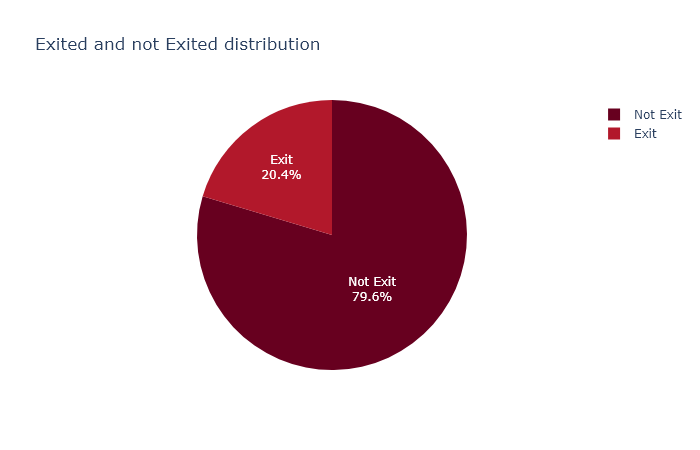

The dataset contain 10000 data and only 20.4% data is 'Exit'


In [4]:
model_trainer.show_label_distribution()
print(f"The dataset contain {model_trainer._NNDataP.df_all_data.shape[0]} data and only 20.4% data is 'Exit'")

In [5]:
model_trainer.show_available_parmas_options()

['baseline', 'with_class_weight', 'with_oversampling']


In [6]:
model_trainer_with_class_weight = deepcopy(model_trainer)
model_trainer_with_oversampling = deepcopy(model_trainer)

In [7]:
model_trainer.select_parmas('baseline')
print('')
model_trainer_with_class_weight.select_parmas('with_class_weight')
print('')
model_trainer_with_oversampling.select_parmas('with_oversampling')

number of combinations: 1


,optimizer_attr,lr,amsgrad,batch_size,shuffle,class_weight,dropout_percent,list_layers_input_size,oversampling_w,desc
0,Adam,0.02,False,1000,True,None,0.5,"[200, 100]",None,optim_Adam_lr_0.02_ams_False_bs_1000_sf_True_c...



number of combinations: 3


,optimizer_attr,lr,amsgrad,batch_size,shuffle,class_weight,dropout_percent,list_layers_input_size,oversampling_w,desc
0,Adam,0.02,False,1000,True,"[tensor(1.), tensor(4.)]",0.5,"[200, 100]",None,optim_Adam_lr_0.02_ams_False_bs_1000_sf_True_c...
1,Adam,0.02,False,1000,True,"[tensor(1.), tensor(3.)]",0.5,"[200, 100]",None,optim_Adam_lr_0.02_ams_False_bs_1000_sf_True_c...
2,Adam,0.02,False,1000,True,"[tensor(1.), tensor(2.)]",0.5,"[200, 100]",None,optim_Adam_lr_0.02_ams_False_bs_1000_sf_True_c...



number of combinations: 3


,optimizer_attr,lr,amsgrad,batch_size,shuffle,class_weight,dropout_percent,list_layers_input_size,oversampling_w,desc
0,Adam,0.02,False,1000,False,None,0.5,"[200, 100]","[1, 4]",optim_Adam_lr_0.02_ams_False_bs_1000_sf_False_...
1,Adam,0.02,False,1000,False,None,0.5,"[200, 100]","[1, 3]",optim_Adam_lr_0.02_ams_False_bs_1000_sf_False_...
2,Adam,0.02,False,1000,False,None,0.5,"[200, 100]","[1, 2]",optim_Adam_lr_0.02_ams_False_bs_1000_sf_False_...


In [8]:
is_log_in_tsboard = True

# Baseline (not use class weight and oversampling)
# use Min loss to select the best model

In [9]:
model_trainer.cross_validate(cv_strategy = 'min_loss', num_max_epochs = 200, patience = 15,
                                is_log_in_tsboard = is_log_in_tsboard)

model_parmas: optim_Adam_lr_0.02_ams_False_bs_1000_sf_True_cw_None_dp_0.5_ls_[200, 100]_ow_None
ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 1
EarlyStopping object created
Early stopping at 32

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 2
EarlyStopping object created
Early stopping at 26

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 3
EarlyStopping object created
Early stopping at 35

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 4
EarlyStopping object created
Early stopping at 57

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 5
EarlyStopping object created
Early stopping at 35


All model is trained successfully


In [10]:
model_trainer.df_cv_performance

,optimizer_attr,lr,amsgrad,batch_size,shuffle,class_weight,dropout_percent,list_layers_input_size,oversampling_w,desc,...,mean_cv_f1,std_cv_f1,list_cv_precis,mean_cv_precis,std_cv_precis,list_cv_recall,mean_cv_recall,std_cv_recall,model_index,best_cv_index
0,Adam,0.02,False,1000,True,None,0.5,"[200, 100]",None,optim_Adam_lr_0.02_ams_False_bs_1000_sf_True_c...,...,0.749917,0.00756,"[0.821296526815275, 0.828696435839293, 0.84114...",0.815798,0.020372,"[0.7081916768595121, 0.7177865955254211, 0.727...",0.718092,0.006268,0,1


In [11]:
model_trainer.test_model(dataset = 'test_set')
model_trainer.show_classification_report(dataset = 'test_set')

ChurnPredictionDataset object created
Classification report:


,precision,recall,f1-score,support
Not exited,0.869148,0.967357,0.915627,1593.000
Exited,0.770925,0.429975,0.552050,407.000
accuracy,0.858000,0.858000,0.858000,0.858
macro avg,0.820037,0.698666,0.733839,2000.000
weighted avg,0.849160,0.858000,0.841639,2000.000


In [12]:
model_trainer.test_model(dataset = 'train_set')
model_trainer.show_classification_report(dataset = 'train_set')

ChurnPredictionDataset object created
ChurnPredictionDataset object created
Classification report:


,precision,recall,f1-score,support
Not exited,0.877591,0.963697,0.918631,5096.000000
Exited,0.769900,0.474693,0.587287,1304.000000
accuracy,0.864062,0.864062,0.864062,0.864062
macro avg,0.823746,0.719195,0.752959,6400.000000
weighted avg,0.855649,0.864062,0.851119,6400.000000


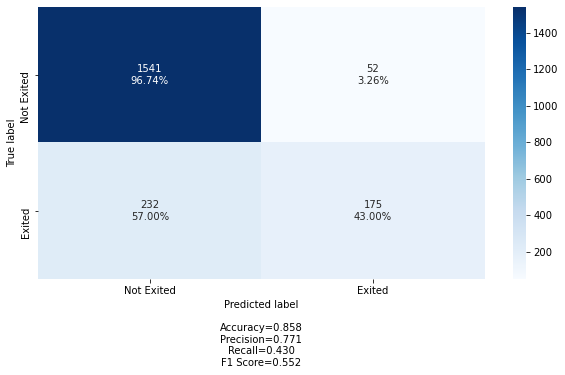

In [13]:
model_trainer.plot_cf_matrix('test_set', normalize = 'true')

# Assign class weight
# use Max f1 score to select best the model

In [14]:
model_trainer_with_class_weight.cross_validate(cv_strategy = 'max_f1', num_max_epochs = 200, patience = 15,
                                                  is_log_in_tsboard = is_log_in_tsboard)

model_parmas: optim_Adam_lr_0.02_ams_False_bs_1000_sf_True_cw_tensor([1., 4.])_dp_0.5_ls_[200, 100]_ow_None
ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 1
EarlyStopping object created
Early stopping at 35

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 2
EarlyStopping object created
Early stopping at 33

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 3
EarlyStopping object created
Early stopping at 56

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 4
EarlyStopping object created
Early stopping at 74

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 5
EarlyStopping object created
Early stopping at 94

model_parmas: optim_Adam_lr_0.02_ams_False_bs_1000_sf_True_cw_tensor([1., 3.])_dp_0.5_ls_[20

In [15]:
model_trainer_with_class_weight.df_cv_performance

,optimizer_attr,lr,amsgrad,batch_size,shuffle,class_weight,dropout_percent,list_layers_input_size,oversampling_w,desc,...,mean_cv_f1,std_cv_f1,list_cv_precis,mean_cv_precis,std_cv_precis,list_cv_recall,mean_cv_recall,std_cv_recall,model_index,best_cv_index
2,Adam,0.02,False,1000,True,"[tensor(1.), tensor(2.)]",0.5,"[200, 100]",None,optim_Adam_lr_0.02_ams_False_bs_1000_sf_True_c...,...,0.757502,0.004505,"[0.753439173285571, 0.7553209684162518, 0.7599...",0.754666,0.002993,"[0.7602931687068409, 0.7587955427569801, 0.769...",0.760764,0.007710,2,2
1,Adam,0.02,False,1000,True,"[tensor(1.), tensor(3.)]",0.5,"[200, 100]",None,optim_Adam_lr_0.02_ams_False_bs_1000_sf_True_c...,...,0.742791,0.009900,"[0.730680058787007, 0.7434218873167373, 0.7195...",0.725322,0.010613,"[0.7826853251918984, 0.7817968622087816, 0.786...",0.777256,0.008039,1,1
0,Adam,0.02,False,1000,True,"[tensor(1.), tensor(4.)]",0.5,"[200, 100]",None,optim_Adam_lr_0.02_ams_False_bs_1000_sf_True_c...,...,0.730897,0.009375,"[0.7138941741415239, 0.7264880952380952, 0.710...",0.712914,0.008312,"[0.7728375918559968, 0.7931687068409242, 0.782...",0.777930,0.008949,0,1


In [16]:
model_trainer_with_class_weight.test_model(dataset = 'test_set')
model_trainer_with_class_weight.show_classification_report(dataset = 'test_set')

ChurnPredictionDataset object created
Classification report:


,precision,recall,f1-score,support
Not exited,0.896338,0.906466,0.901373,1593.000
Exited,0.616967,0.589681,0.603015,407.000
accuracy,0.842000,0.842000,0.842000,0.842
macro avg,0.756652,0.748073,0.752194,2000.000
weighted avg,0.839486,0.842000,0.840657,2000.000


In [17]:
model_trainer_with_class_weight.test_model(dataset = 'train_set')
model_trainer_with_class_weight.show_classification_report(dataset = 'train_set')

ChurnPredictionDataset object created
ChurnPredictionDataset object created
Classification report:


,precision,recall,f1-score,support
Not exited,0.905228,0.907182,0.906204,5096.000000
Exited,0.634184,0.628834,0.631498,1304.000000
accuracy,0.850469,0.850469,0.850469,0.850469
macro avg,0.769706,0.768008,0.768851,6400.000000
weighted avg,0.850003,0.850469,0.850233,6400.000000


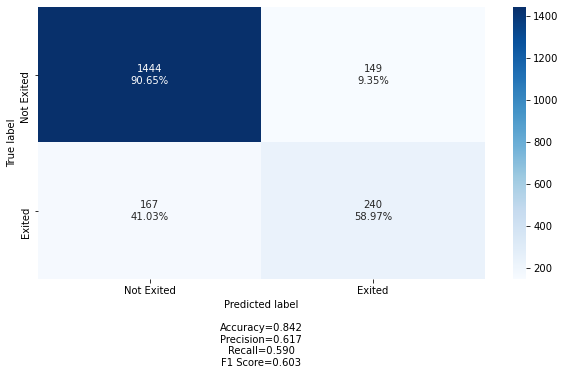

In [18]:
model_trainer_with_class_weight.plot_cf_matrix('test_set', normalize = 'true')

# Assign class weight
# use Max recall score to select best the model

In [30]:
model_trainer_with_class_weight.find_best_model_by_strategy('max_recall')

In [31]:
model_trainer_with_class_weight.df_cv_performance

,optimizer_attr,lr,amsgrad,batch_size,shuffle,class_weight,dropout_percent,list_layers_input_size,oversampling_w,desc,...,mean_cv_f1,std_cv_f1,list_cv_precis,mean_cv_precis,std_cv_precis,list_cv_recall,mean_cv_recall,std_cv_recall,model_index,best_cv_index
0,Adam,0.02,False,1000,True,"[tensor(1.), tensor(4.)]",0.5,"[200, 100]",None,optim_Adam_lr_0.02_ams_False_bs_1000_sf_True_c...,...,0.730897,0.009375,"[0.7138941741415239, 0.7264880952380952, 0.710...",0.712914,0.008312,"[0.7728375918559968, 0.7931687068409242, 0.782...",0.777930,0.008949,0,1
1,Adam,0.02,False,1000,True,"[tensor(1.), tensor(3.)]",0.5,"[200, 100]",None,optim_Adam_lr_0.02_ams_False_bs_1000_sf_True_c...,...,0.742791,0.009900,"[0.730680058787007, 0.7434218873167373, 0.7195...",0.725322,0.010613,"[0.7826853251918984, 0.7817968622087816, 0.786...",0.777256,0.008039,1,2
2,Adam,0.02,False,1000,True,"[tensor(1.), tensor(2.)]",0.5,"[200, 100]",None,optim_Adam_lr_0.02_ams_False_bs_1000_sf_True_c...,...,0.757502,0.004505,"[0.753439173285571, 0.7553209684162518, 0.7599...",0.754666,0.002993,"[0.7602931687068409, 0.7587955427569801, 0.769...",0.760764,0.007710,2,2


In [32]:
model_trainer_with_class_weight.test_model(dataset = 'test_set')
model_trainer_with_class_weight.show_classification_report(dataset = 'test_set')

ChurnPredictionDataset object created
Classification report:


,precision,recall,f1-score,support
Not exited,0.918397,0.805399,0.858194,1593.000
Exited,0.485904,0.719902,0.580198,407.000
accuracy,0.788000,0.788000,0.788000,0.788
macro avg,0.702150,0.762650,0.719196,2000.000
weighted avg,0.830384,0.788000,0.801622,2000.000


In [33]:
model_trainer_with_class_weight.test_model(dataset = 'train_set')
model_trainer_with_class_weight.show_classification_report(dataset = 'train_set')

ChurnPredictionDataset object created
ChurnPredictionDataset object created
Classification report:


,precision,recall,f1-score,support
Not exited,0.926487,0.803768,0.860775,5096.000000
Exited,0.494694,0.750767,0.596406,1304.000000
accuracy,0.792969,0.792969,0.792969,0.792969
macro avg,0.710591,0.777267,0.728591,6400.000000
weighted avg,0.838509,0.792969,0.806910,6400.000000


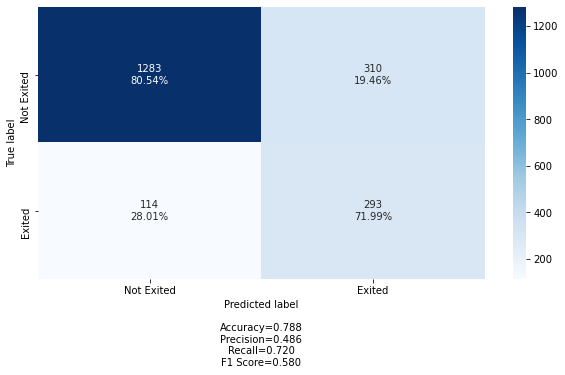

In [34]:
model_trainer_with_class_weight.plot_cf_matrix('test_set', normalize = 'true')

# Oversampling
# use Max f1 score to select best the model

In [19]:
model_trainer_with_oversampling.cross_validate(cv_strategy = 'max_f1', num_max_epochs = 200, patience = 15,
                                                  is_log_in_tsboard = is_log_in_tsboard)

model_parmas: optim_Adam_lr_0.02_ams_False_bs_1000_sf_False_cw_None_dp_0.5_ls_[200, 100]_ow_[1 4]
ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 1
EarlyStopping object created
Early stopping at 25

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 2
EarlyStopping object created
Early stopping at 21

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 3
EarlyStopping object created
Early stopping at 43

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 4
EarlyStopping object created
Early stopping at 57

ChurnPredictionDataset object created
ChurnPredictionDataset object created
NNModel object created
cv_num: 5
EarlyStopping object created
Early stopping at 22

model_parmas: optim_Adam_lr_0.02_ams_False_bs_1000_sf_False_cw_None_dp_0.5_ls_[200, 100]_ow_[1 3]
Chur

In [20]:
model_trainer_with_oversampling.df_cv_performance

,optimizer_attr,lr,amsgrad,batch_size,shuffle,class_weight,dropout_percent,list_layers_input_size,oversampling_w,desc,...,mean_cv_f1,std_cv_f1,list_cv_precis,mean_cv_precis,std_cv_precis,list_cv_recall,mean_cv_recall,std_cv_recall,model_index,best_cv_index
2,Adam,0.02,False,1000,False,None,0.5,"[200, 100]","[1, 2]",optim_Adam_lr_0.02_ams_False_bs_1000_sf_False_...,...,0.756974,0.006546,"[0.7643589743589743, 0.7749781979481445, 0.776...",0.776356,0.006902,"[0.7482399283450992, 0.7285179763269158, 0.743...",0.742713,0.008980,2,3
1,Adam,0.02,False,1000,False,None,0.5,"[200, 100]","[1, 3]",optim_Adam_lr_0.02_ams_False_bs_1000_sf_False_...,...,0.751361,0.011396,"[0.7441055534209762, 0.7534220658209647, 0.750...",0.747548,0.014052,"[0.7768754032995926, 0.7580106134006221, 0.761...",0.756704,0.013631,1,3
0,Adam,0.02,False,1000,False,None,0.5,"[200, 100]","[1, 4]",optim_Adam_lr_0.02_ams_False_bs_1000_sf_False_...,...,0.737304,0.012939,"[0.7087062408195137, 0.74070610240823, 0.73114...",0.721352,0.013454,"[0.7760808429081874, 0.7677090656932901, 0.796...",0.769666,0.016254,0,1


In [21]:
model_trainer_with_oversampling.test_model(dataset = 'test_set')
model_trainer_with_oversampling.show_classification_report(dataset = 'test_set')

ChurnPredictionDataset object created
Classification report:


,precision,recall,f1-score,support
Not exited,0.886432,0.930948,0.908145,1593.00
Exited,0.663609,0.533170,0.591281,407.00
accuracy,0.850000,0.850000,0.850000,0.85
macro avg,0.775020,0.732059,0.749713,2000.00
weighted avg,0.841087,0.850000,0.843663,2000.00


In [22]:
model_trainer_with_oversampling.test_model(dataset = 'train_set')
model_trainer_with_oversampling.show_classification_report(dataset = 'train_set')

ChurnPredictionDataset object created
ChurnPredictionDataset object created
Classification report:


,precision,recall,f1-score,support
Not exited,0.895593,0.929160,0.912068,5096.000000
Exited,0.675651,0.576687,0.622259,1304.000000
accuracy,0.857344,0.857344,0.857344,0.857344
macro avg,0.785622,0.752924,0.767163,6400.000000
weighted avg,0.850780,0.857344,0.853019,6400.000000


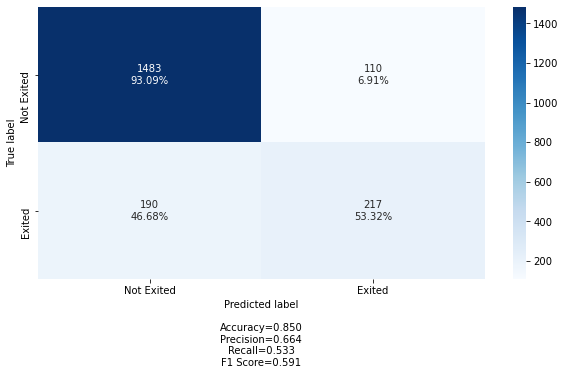

In [23]:
model_trainer_with_oversampling.plot_cf_matrix('test_set', normalize = 'true')

# Oversampling
# use Max recall score to select best the model

In [24]:
model_trainer_with_oversampling.find_best_model_by_strategy('max_recall')

In [25]:
model_trainer_with_oversampling.df_cv_performance

,optimizer_attr,lr,amsgrad,batch_size,shuffle,class_weight,dropout_percent,list_layers_input_size,oversampling_w,desc,...,mean_cv_f1,std_cv_f1,list_cv_precis,mean_cv_precis,std_cv_precis,list_cv_recall,mean_cv_recall,std_cv_recall,model_index,best_cv_index
0,Adam,0.02,False,1000,False,None,0.5,"[200, 100]","[1, 4]",optim_Adam_lr_0.02_ams_False_bs_1000_sf_False_...,...,0.737304,0.012939,"[0.7087062408195137, 0.74070610240823, 0.73114...",0.721352,0.013454,"[0.7760808429081874, 0.7677090656932901, 0.796...",0.769666,0.016254,0,2
1,Adam,0.02,False,1000,False,None,0.5,"[200, 100]","[1, 3]",optim_Adam_lr_0.02_ams_False_bs_1000_sf_False_...,...,0.751361,0.011396,"[0.7441055534209762, 0.7534220658209647, 0.750...",0.747548,0.014052,"[0.7768754032995926, 0.7580106134006221, 0.761...",0.756704,0.013631,1,0
2,Adam,0.02,False,1000,False,None,0.5,"[200, 100]","[1, 2]",optim_Adam_lr_0.02_ams_False_bs_1000_sf_False_...,...,0.756974,0.006546,"[0.7643589743589743, 0.7749781979481445, 0.776...",0.776356,0.006902,"[0.7482399283450992, 0.7285179763269158, 0.743...",0.742713,0.008980,2,3


In [26]:
model_trainer_with_oversampling.test_model(dataset = 'test_set')
model_trainer_with_oversampling.show_classification_report(dataset = 'test_set')

ChurnPredictionDataset object created
Classification report:


,precision,recall,f1-score,support
Not exited,0.913589,0.822976,0.865918,1593.000
Exited,0.500885,0.695332,0.582305,407.000
accuracy,0.797000,0.797000,0.797000,0.797
macro avg,0.707237,0.759154,0.724111,2000.000
weighted avg,0.829604,0.797000,0.808203,2000.000


In [27]:
model_trainer_with_oversampling.test_model(dataset = 'train_set')
model_trainer_with_oversampling.show_classification_report(dataset = 'train_set')

ChurnPredictionDataset object created
ChurnPredictionDataset object created
Classification report:


,precision,recall,f1-score,support
Not exited,0.925569,0.829670,0.875000,5096.00000
Exited,0.526201,0.739264,0.614796,1304.00000
accuracy,0.811250,0.811250,0.811250,0.81125
macro avg,0.725885,0.784467,0.744898,6400.00000
weighted avg,0.844198,0.811250,0.821983,6400.00000


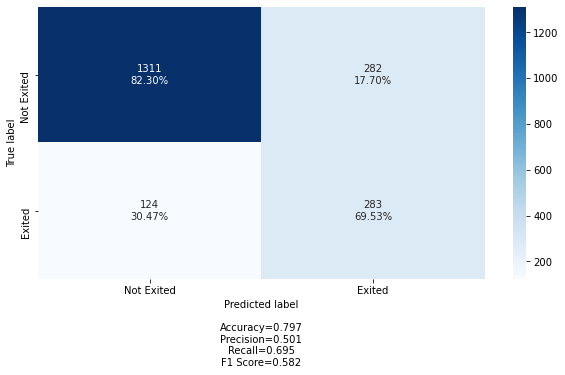

In [28]:
model_trainer_with_oversampling.plot_cf_matrix('test_set', normalize = 'true')